<a href="https://colab.research.google.com/github/JennaBeutler/APRD-6342/blob/master/Exercise_2_Ad_Cost_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Exercise 2: Ad Cost Regression Analysis
### APRD 6342  
### Fall 2019  
### Jenna Beutler

Importing all necessary packages, mounting the drive, and uploading Travel Pony ad dataset

In [0]:
import seaborn as sns
import numpy as np 
import pandas as pd
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/drive')

In [0]:
path = '/content/drive/My Drive/Colab Notebooks/Python Exercises/Travel Pony Facebook.csv'
travelpony = pd.read_csv(path)
travelpony.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857


Only want to look at ads that actually ran, meaning some amount of money was spent on them to run

In [0]:
travelpony = travelpony[travelpony['Amount Spent (USD)'] > 0]



---



#### Question 1 (part I and II)  
Create a histogram for amount spent  
Create scatter plots for spend and: reach, frequency, impressions and clicks  


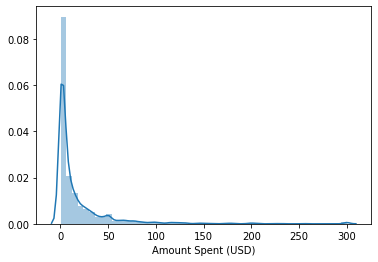

In [0]:
sns.distplot(travelpony['Amount Spent (USD)'])

Text(0.5, 1.0, 'Reach')

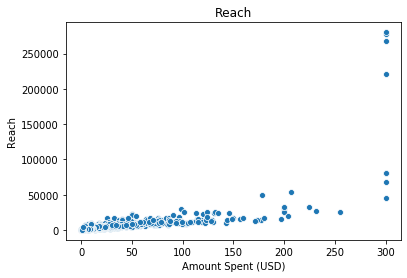

In [0]:
reach = sns.scatterplot(x=travelpony['Amount Spent (USD)'], y=travelpony['Reach'])
reach.set_title('Reach')

Text(0.5, 1.0, 'Frequency')

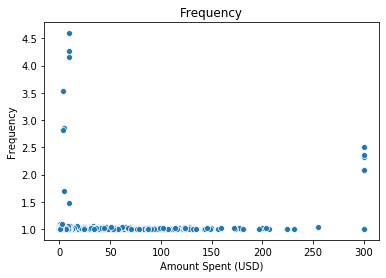

In [0]:
freq = sns.scatterplot(x=travelpony['Amount Spent (USD)'], y=travelpony['Frequency'])
freq.set_title('Frequency')

Text(0.5, 1.0, 'Impressions')

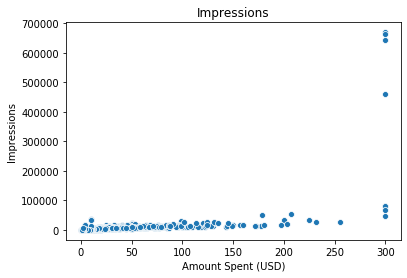

In [0]:
imps = sns.scatterplot(x=travelpony['Amount Spent (USD)'], y=travelpony['Impressions'])
imps.set_title('Impressions')

Text(0.5, 1.0, 'Clicks')

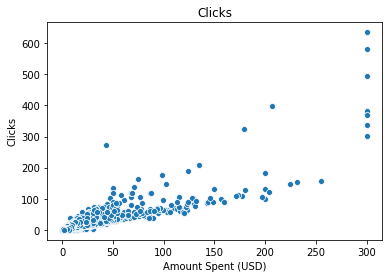

In [0]:
clicks = sns.scatterplot(x=travelpony['Amount Spent (USD)'], y=travelpony['Clicks'])
clicks.set_title('Clicks')



---



#### Question 2:
Build a multiple regression where the outcome variable is Amount Spent and the predictor variables are:   
Campaign Name  
Reach  
Frequency  
Impressions  
Clicks  
Unique Clicks  
Page Likes  
Page Engagement  
Post Engagement  
Post Likes  
Post Comments  
Post Shares  
Photo Views  
Website Clicks



Since the Campaign Name is a categorical column with over 300 different "unique" names, some data cleaning is necessary to group them all into 7 categories. 

In [0]:
travelpony['Campaign Name'].unique()

In [0]:
# Changing the data type to string so it's easier to manipulate
# replacing extra characters 
travelpony['Campaign Name'] = travelpony['Campaign Name'].astype('str') 
travelpony['Campaign Name'] = travelpony['Campaign Name'].str.replace('[^a-zA-Z0-9:\s+]', '') 
travelpony['Campaign Name'] = travelpony['Campaign Name'].str.replace('\d+', '') 

In [0]:
# Dummy coding the Campaign names so I can use them in the regression. 
pd.get_dummies(travelpony['Campaign Name'])
travelpony = pd.concat([travelpony, pd.get_dummies(travelpony['Campaign Name'])], axis=1)
travelpony.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD),Ad,Cyber Weekend,Nanigans,Post: You need to get some real sun and we are here to,SimpleMultiFillCampaign,TravelPony: Conversion Test,TravelPony: General Ads,TravelponyPage LikesUS,http:travelponyClicksUS
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512,0,1,0,0,0,0,0,0,0
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349,0,1,0,0,0,0,0,0,0
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476,0,1,0,0,0,0,0,0,0
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315,0,1,0,0,0,0,0,0,0
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857,0,0,0,0,0,0,1,0,0


In [0]:
# Looking at and changing the column names to be simpler to work with
travelpony.columns
travelpony.columns = ['Start Date', 'End Date', 'Account', 'Campaign Name', 'Reach',
       'Frequency', 'Impressions', 'Clicks', 'Unique Clicks',
       'Amount Spent (USD)', 'Page Likes', 'Page Engagement',
       'Post Engagement', 'Post Likes', 'Post Comments', 'Post Shares',
       'Photo Views', 'Website Clicks', 'Cost per Page Like (USD)',
       'Cost per Page Engagement (USD)', 'Ad', 'Cyber Weekend', 'Nanigans',
       'Post',
       'SimpleMultiFillCampaign', 'Conversion Test',
       'General Ads', 'TravelponyPageLikes',
       'Travelpony Clicks']

Setting up the regression and looking at the summary of the fit model. 

In [0]:
target = travelpony['Amount Spent (USD)']
dep = travelpony[['Cyber Weekend', 'Ad', 'Nanigans' , 'Post', 'SimpleMultiFillCampaign', 'Conversion Test', 'General Ads', 'TravelponyPageLikes', 'Travelpony Clicks' ,'Reach','Frequency','Impressions','Clicks','Unique Clicks','Page Likes','Page Engagement','Post Engagement','Post Likes','Post Comments','Post Shares','Photo Views','Website Clicks']]
model = sm.OLS(target, dep).fit()
predictions = model.predict(dep)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1282.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:49:56   Log-Likelihood:                -6484.6
No. Observations:                1802   AIC:                         1.301e+04
Df Residuals:                    1781   BIC:                         1.313e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Cyber Weekend            -210.0978     26.172     -8.028      0.000    -261.429    -158.766
Ad                         -8.7199      4.648     -1.876      0.061     -17.836       0.396
Nanigans                  -11.1471      3.438     -3.242      0.001     -17.891      -4.403
Post                      -25.4838      7.772     -3.279      0.001     -40.726     -10.241
SimpleMultiFillCampaign    -8.8824      3.374     -2.632      0.009     -15.500      -2.265
Conversion Test            45.4009      5.816      7.806      0.000      33.993      56.808
General Ads               -34.0630      6.690     -5.091      0.000     -47.185     -20.941
TravelponyPageLikes       -15.2335      5.554     -2.743      0.006     -26.127      -4.340
Travelpony Clicks         -26.2998     11.525     -2.282      0.023     -48.904      -3.695
Reach                       0.0031      0.000     20.623      0.000       0.003       0.003
Frequency                   8.0177      3.337      2.403      0.016       1.474      14.562
Impressions                -0.0008   8.08e-05     -9.964      0.000      -0.001      -0.001
Clicks                     -0.3369      0.110     -3.073      0.002      -0.552      -0.122
Unique Clicks               0.5557      0.122      4.569      0.000       0.317       0.794
Page Likes                 23.2839      8.919      2.611      0.009       5.791      40.777
Page Engagement           -20.1012      8.916     -2.255      0.024     -37.588      -2.615
Post Engagement            17.1443      7.431      2.307      0.021       2.571      31.718
Post Likes                  2.3301      1.491      1.563      0.118      -0.594       5.254
Post Comments               3.5094      1.551      2.263      0.024       0.468       6.551
Post Shares                 4.8389      1.513      3.198      0.001       1.871       7.807
Photo Views                 3.1375      1.489      2.107      0.035       0.217       6.058
Website Clicks              3.3284      1.489      2.235      0.026       0.408       6.249
==============================================================================
Omnibus:                      734.641   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20578.497
Skew:                           1.310   Prob(JB):                         0.00
Kurtosis:                      19.347   Cond. No.                     3.41e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""